# Quelques exercices de Regression lineaires...

Notre objectif  est maintenant d'obtenir une expérience pratique et une intuition de la régression linéaire et de la régularisation. 


## Overview:

Dans ce cahier, nous introduirons la notion de régression lineaire et verrons comment améliorer l'apprentissage et la prédiction en introduisant une régularisation. Nous nous concentrerons principalement sur les applications simples de la régression linéaire: minimiser l'erreur quadratique moyenne (MSE) sur les données d'apprentissage (c'est-à-dire l'erreur intra-échantillon) et voir comment nous nous en tirerons sur les données de test (c'est-à-dire les erreurs hors échantillon). ). 

Nous allons considérer le problème de la régression des moindres carrés ordinaire dans lequel la "fonction d'erreur" est définie comme le **carré de la déviation de notre prédicteur linéaire à la réponse vraie**. Nous allons cependant compléter cette fonction d'erreur avec un régularisateur qui évite les surajustements, pour obtenir la Régularisation de Ridge (ou de Tikhonov).

Considérons des données de la forme $ (y_i, \mathbf {x} ^ {(i)}) $ où l'index $ i = 1 \ldots n $ dépasse le nombre d'exemples dans les données d'apprentissage et $ \mathbf {x} ^ {(i)} $ est un vecteur de fonction dimensionnelle $ p $. Pour faciliter la notation, il est utile de définir la matrice $ X $ des datas qui est $ n \times p $  dont les lignes, $ \textbf {x} ^ {(1)}, \cdots, \textbf { x} ^ {(n)} $, sont les exemples et les colonnes, $ \mathbf {X} _ {:, 1}, \cdots, \mathbf {X} _ {:, p} $, sont les "caractéristiques mesurées "(ie les prédicteurs).  Nous notons également le vecteur colonne dimensionnelle $ n $ de l'échantillon $ i $ as $ \mathbf {y} _i $ et le vecteur colonne dimensionnel $ p $ des paramètres de régression $ \mathbf {w} \in \mathbb {R} ^ p $.

Pour la régression des moindres carrés ordinaire (pas de régularisation), nous minimisons la fonction de coût de perte au carré:
$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\textbf{Xw}-\textbf{y}||_2^2 = \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} \,(\mathbf{Xw}-\mathbf{y})^T(\mathbf{Xw}-\mathbf{y}),
$$
ou de facon equivalente:
$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}}   \sum_{i=1}^n (y_i -\mathbf{w}\cdot\mathbf{x}^{(i)})^2.
$$

Si le rang de la matrice est tel que $rank(\mathbf{X})=p$, namely, les prédicteurs (elements) de  $ \mathbf {X} _ {:, 1}, \cdots \mathbf {X} _ {:, p} $ sont linéairement indépendants, et il existe alors une solution unique à ce problème:
$$
\hat{\textbf{w}}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \textbf{y}
$$

## Jouons d'abord avec les polynomes ##
Nous allons commencer par essayer de fitter des données que nous allons générer à l'aide de polynomes. Commençons par créer nos données. En physique, nous avons souvent des signaux sinusoïdaux avec du bruit, c'est la situation que nous allons esssayer de reproduire.

* Soit $(X,Y)$ une paire de variables aléatoires ayant les propriétés suivantes : $X$ suit une loi uniforme sur $[0,1]$ et $Y = sin(6X)+\sigma Z$ où $\sigma =0.5$ et $Z$ est une variable aléatoire indépendante de $X$ suivant une loi normale de paramètres (0,1).
* Dans le modèle précédent, si par exemple nous mesurons un signal électrique au cours du temps, les réalisations de $X$ correspondent aux instants où la mesure est faite, $Y$ correspond au résultat de la mesure, et $Z$ au bruit possible. 


***Exercice :*** Générer 400 tirages de X et Y : $(x_i,y_i)$ pour $i=1....400$, puis les tracer avec sur le même graphe la fonction $f:x \rightarrow sin(6x)$

[0.1301237  0.53087237 0.91547965 0.71198322 0.06116387 0.74364707
 0.82583251 0.23339153 0.41956095 0.96111352 0.52235261 0.45115203
 0.68628933 0.37771272 0.35940583 0.19924857 0.02361094 0.42458634
 0.54025439 0.86525916 0.9848162  0.77918957 0.49964186 0.58318183
 0.74072109 0.97335769 0.68897774 0.7839998  0.99370599 0.88316326
 0.15561183 0.70184806 0.00664352 0.64427029 0.6231587  0.93907013
 0.38345408 0.78890094 0.25422745 0.97424197 0.64355767 0.22109949
 0.48461256 0.16841609 0.2844235  0.98456904 0.24943159 0.49899691
 0.10655924 0.10037549 0.81569311 0.25354371 0.38696932 0.1477282
 0.85334253 0.1408178  0.66696599 0.65753865 0.99228492 0.1044333
 0.57524567 0.10851169 0.2117304  0.39884869 0.04349935 0.8492539
 0.4808057  0.7636835  0.32489053 0.31132817 0.47400599 0.92048421
 0.02097701 0.99202498 0.79383195 0.72095371 0.99244229 0.36079247
 0.59683086 0.50803756 0.80595581 0.50330327 0.42620536 0.00540559
 0.53847664 0.85279957 0.81962513 0.15068877 0.69245204 0.4817779

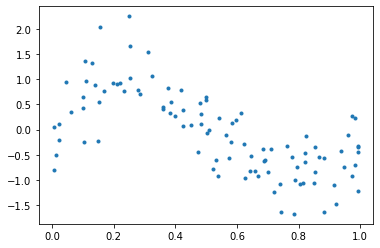

(array([ 8.,  5., 10., 19., 20., 16.,  9.,  9.,  2.,  2.]),
 array([-2.00155774, -1.55001552, -1.0984733 , -0.64693108, -0.19538886,
         0.25615336,  0.70769558,  1.15923781,  1.61078003,  2.06232225,
         2.51386447]),
 <BarContainer object of 10 artists>)

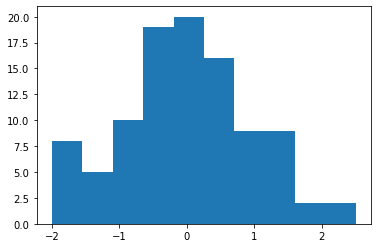

In [9]:
import numpy as np
import matplotlib.pyplot as plt
X=np.random.rand(100)
print(X)

Z=np.random.normal(0,1,100)
Y=np.sin(6*X)+0.5*Z
plt.plot(X,Y,'.')
plt.show()
plt.hist(Z)


***Exercice : *** Séparer les données en un ensemble de test(20%) et un ensemble d'entrainement(80%)

In [10]:
X_test=X[0:20]
y_test=Y[0:20]
X_train=X[20:100]
y_train=Y[20:100]


Maintenant, nous allons essayer de fitter ces données précédentes avec des polynômes de différents degrés

### Fit avec un polynôme de degré 1 ###
Nous avons à notre disposition la formule du paragraphe précédent, la question est, comment mettre ce problème sous forme matricielle ? Il suffit en fait de construire une matrice X dont la dimension est $n\times 2$ et où la ligne i est $(1, x_i)$


*** Exercice :*** A l'aide de ce qui vient d'être dit, et de la formule du paragraphe précédent, écrire un programme qui résout le problème de régression avec un polynome de degré 1, et tracer le résultat sur une figure avec : les données, la fonction sin(6x), et le fit.

[ 0.89881332 -1.81752029]


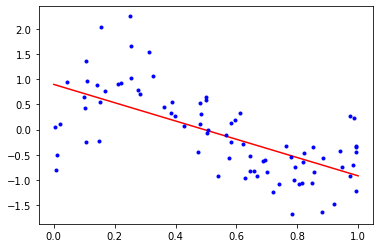

In [11]:
Vect1=np.ones(X_train.shape)
X_Dim2=np.array([Vect1,X_train])
X_Dim2=X_Dim2.T

W=np.dot(np.linalg.inv(np.dot(X_Dim2.T,X_Dim2)),np.dot(X_Dim2.T,y_train))
print(W)
X_fit=np.linspace(0,1,X.size)
Y_fit=W[0]+W[1]*X_fit
plt.plot(X_fit,Y_fit,'red')
plt.plot(X_train,y_train,'.',color='blue')

### Fit avec des polynômes de degrés plus élevés ###
Comme on pouvait s'en douter le fit avec un polynôme de degré 1 est de mauvaise qualité, nous allons donc essayer de fitter ces données avec des polynômes de degrés plus élevés :


*** Exercice :*** Comment construire cette fois ci la matrice $X$ pour faire un fit avec un polynôme de degré arbitraire ? (indice dans l'exercice précédent on pouvait écire la ligne i de la forme $(x_i^0,x_i^1)$

***Exercice :*** Coder un algorithme pour fitter les données à un polynôme de degré entre 1 et 15, et tracer les résultats, que remarque-t-on sur les degrés les plus élevés ?

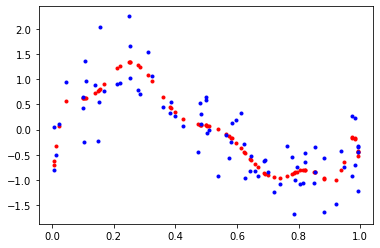

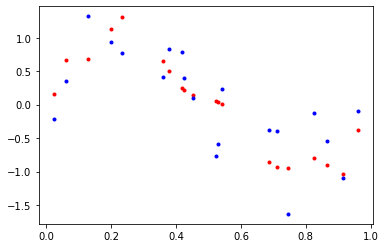

In [12]:
def Fit(X,Xtest,y,N):
    X_puissances=np.zeros((X.size,N))
    for p in range(N):
        X_puissances[:,p]=X**p
    W=np.dot(np.linalg.inv(np.dot(X_puissances.T,X_puissances)),np.dot(X_puissances.T,y))
    
 
    Y_fit=np.zeros(X.shape)
    for i in range(0,N):
        Y_fit=Y_fit+W[i]*X**i
    
    Y_fit_test=np.zeros(Xtest.shape)
    for i in range(0,N):
        Y_fit_test=Y_fit_test+W[i]*Xtest**i
    return X,Y_fit,Y_fit_test


X_fit,Y_fit,Y_fit_test=Fit(X_train,X_test,y_train,20)

#Train
plt.plot(X_fit,Y_fit,'.',color='r')
plt.plot(X_train,y_train,'.',color='blue')
plt.show()

#Test
plt.plot(X_test,Y_fit_test,'.',color='r')
plt.plot(X_test,y_test,'.',color='blue')
plt.show()

***Exercice :*** Pour confirmer votre intuition, tracer la RMSE sur le l'ensemble d'entrainement et de test en fonction du degré du polynôme

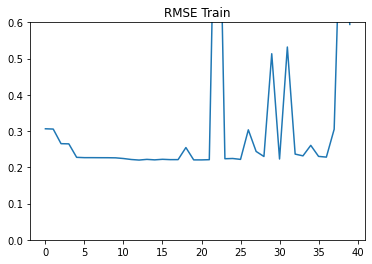

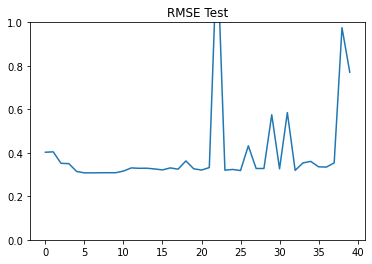

In [13]:
#Train
k=np.arange(40)
RMSE=np.zeros(k.size)
for i in range(k.size):
    Y_Fit_i=Fit(X_train,X_test,y_train,i)[1]
    RMSE[i]= np.sqrt(np.linalg.norm((Y_Fit_i-y_train)/y_train.size))

axes = plt.gca()
axes.set_ylim([0,0.6])
plt.title("RMSE Train")
plt.plot(k,RMSE)
plt.show()

#Test
k=np.arange(40)
RMSE=np.zeros(k.size)
for i in range(k.size):
    
    Y_Fit_i=Fit(X_train,X_test,y_train,i)[2]
    RMSE[i]= np.sqrt(np.linalg.norm((Y_Fit_i-y_test)/y_test.size))


plt.plot(k,RMSE)
axes = plt.gca()
axes.set_ylim([0,1])
plt.title("RMSE Test")
plt.show()


### Comment résoudre ce problème ? ###
Souvent pour éviter l'overfit, on utilise une "pénalité" qui dépend des coefficients. Cette pénalité est soit la norme $L^2$ (ridge) soit la norme $L^1$ (LASSO), nous allons implémenter ces deux méthodes pour le modèle que nous avons étudié précédemment.
#### Ridge regression ####
Pour la regression ridge, le risque s'écrit :


$$ R(w) = \sum_{i=1}^{n} (wx_i -y_i)^2 + \lambda \sum_{i=1}^{n} w_i^2$$

La solution du problème est alors (preuve en bonus à la fin) :
$$ \mathbf{w}_{ridge}= (\mathbf{X}^T\mathbf{X}+\lambda I)^{-1}\mathbf{X}^T \textbf{y}$$

***Exercice*** Coder un algorithme pour fitter les données à un polynôme de degré entre 1 et 15 avec ridge, et tracer les résultats

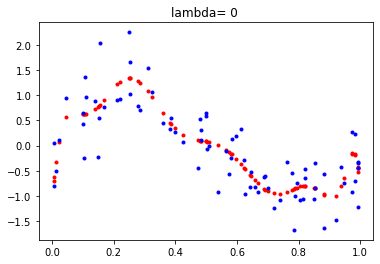

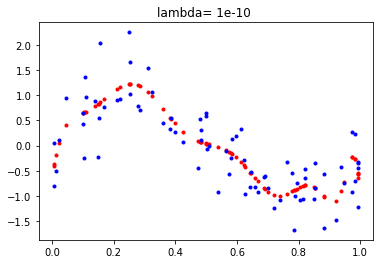

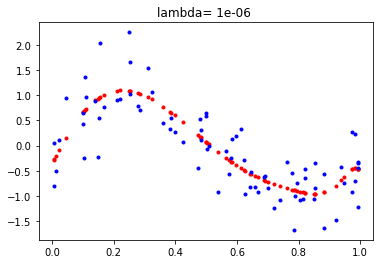

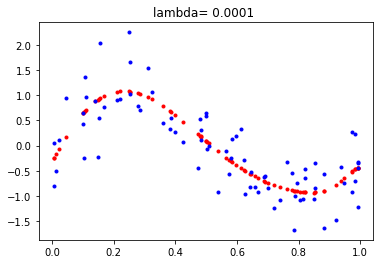

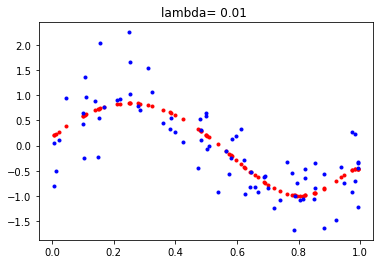

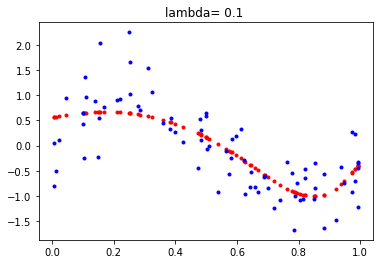

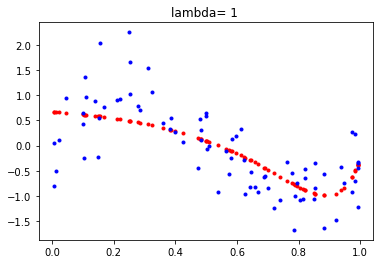

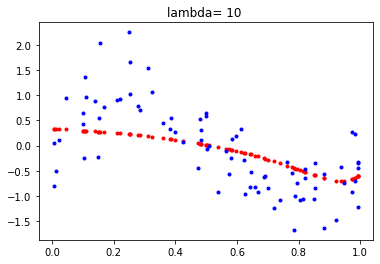

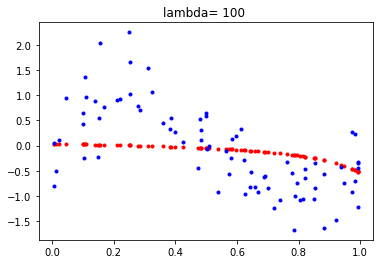

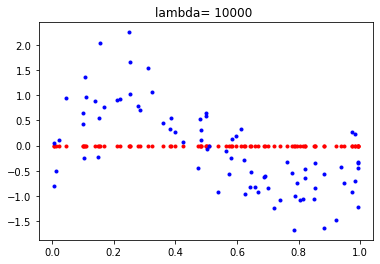

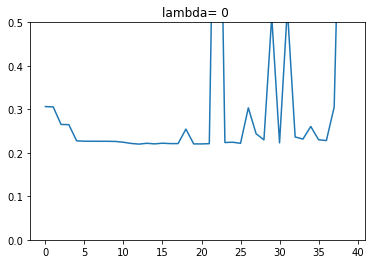

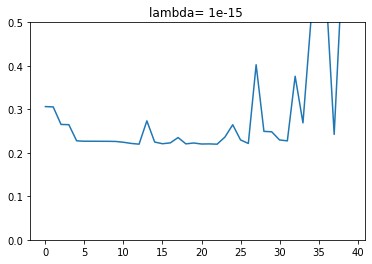

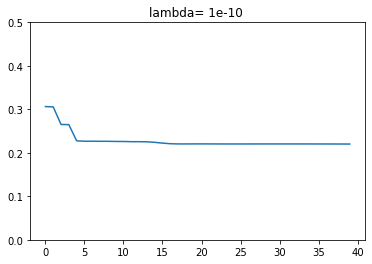

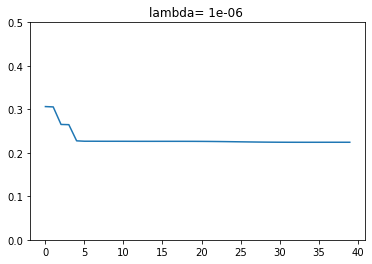

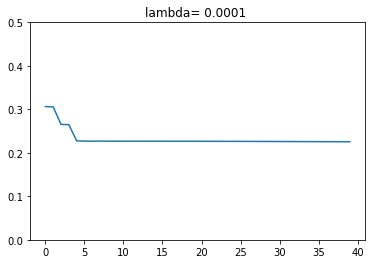

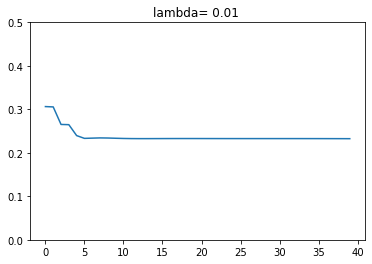

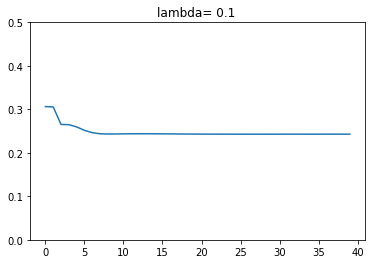

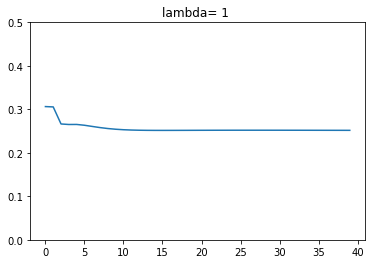

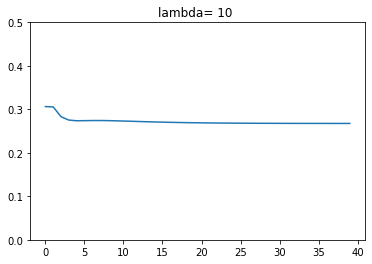

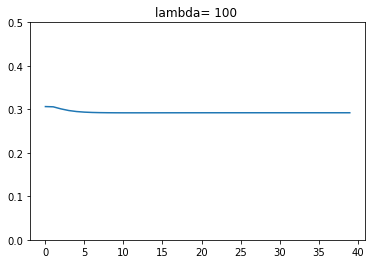

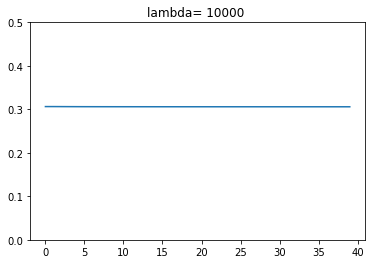

In [17]:
def FitRidge(X,y,N,L):
    X_puissances=np.zeros((X.size,N))
    for p in range(N):
        X_puissances[:,p]=X**p
        
    W=np.dot(np.linalg.inv(np.dot(X_puissances.T,X_puissances)+L*np.eye(N)),np.dot(X_puissances.T,y))
 
    Y_fit=np.zeros(X.shape)
    for i in range(0,N):
        Y_fit=Y_fit+W[i]*X**i
    return X,Y_fit


for Lambda in [0,1e-10,0.000001,0.0001,0.01,0.1,1,10,100,10000]:
    X_fit,Y_fit=FitRidge(X_train,y_train,20,Lambda)
    plt.title("lambda= {} ".format(Lambda))
    plt.plot(X_fit,Y_fit,'.',color='red')
    plt.plot(X_train,y_train,'.',color='blue')
    plt.show()

from scipy.spatial.distance import cdist

for Lambda in [0,1e-15,1e-10,0.000001,0.0001,0.01,0.1,1,10,100,10000]:
    k=np.arange(40)
    RMSE=np.zeros(k.size)

    for i in range(k.size):
        Y_Fit_i=FitRidge(X_train,y_train,i,Lambda)[1]
        RMSE[i]= np.sqrt(np.linalg.norm((Y_Fit_i-y_train)/y_train.size))
    
    axes = plt.gca()
    axes.set_ylim([0,0.5])
    plt.title("lambda= {} ".format(Lambda))
    plt.plot(k,RMSE)
    plt.show()




## Numerical Experiments with Ridge Regression and LASSO##

Nous allons maintenant effectuer quelques expériences numériques avec la base de données sur le diabète en essayant de prédire l’évolution du diabète un an plus tard. Pour plus d'informations sur cet ensemble de données, voir <a href="https://archive.ics.uci.edu/ml/datasets/Diabetes"> https://archive.ics.uci.edu/ml/datasets/ Diabète </a>. Cet ensemble de données a été décrit dans le célèbre <a href="http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf"> régression par le moindre angle </a> par Efron, Hastie, Johnstone, Tibshirani. comme suit:
<blockquote> Dix variables de base, l'âge, le sexe, l'indice de masse corporelle, la pression artérielle moyenne et six mesures de sérum sanguin ont été obtenus pour chacun des patients diabétiques à n $ = 442 $, ainsi que
réponse d'intérêt, une mesure quantitative de la progression de la maladie un an après le début de l'étude. 
Nous commençons par tracer les poids pour chaque valeur de $ \lambda $ pour Ridge Regression et LASSO. Cela s'appelle un chemin de régularisation. Nous comparons également les performances intra-échantillon et non échantillonné entre deux régressions en examinant le coefficient de détermination $ R ^ 2 $ (pour une définition détaillée, voir <a href = "https://en.wikipedia.org/wiki/ Coefficient_de_détermination "> ici </a>). En termes de régression linéaire, $ R ^ 2 $ nous indique dans quelle mesure la fonction de régression correspond aux données. Le meilleur ajustement possible correspond à $ R ^ 2 = 1 $.


 ***Exercice :*** Compléter le code suivant en utilisant la bibliothèque sklearn : placer pour chaque valeur de $\lambda$ (dans le tableau lambdas) les valeurs des coefficients calculés par méthode ridge et LASSO dans les tableaux coefs_ridge et coefs_lasso.

Automatically created module for IPython interactive environment
{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259

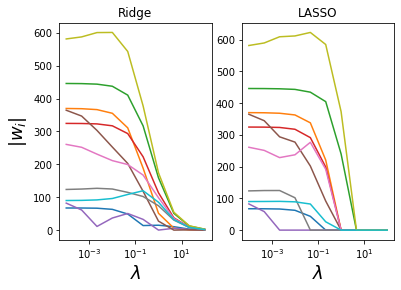

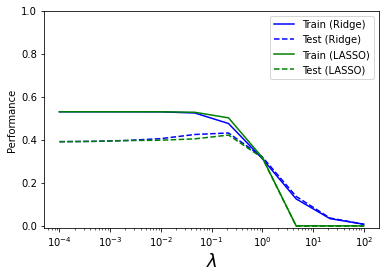

In [19]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

# Load Training Data set with 200 examples

number_examples=200
diabetes = datasets.load_diabetes()
print(diabetes)
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models


# Chooose paths
lambdas = np.logspace(-4, 2, 10)
print(lambdas)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.


n_samples_train = 150
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()

# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]

for a in lambdas:
###Code à insérer ici, les fonctions à trouver sont dans sklearn
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train,y_train)
    coefs_ridge.append(ridge.coef_)
    train_errors_ridge.append(r2_score(y_train,ridge.predict(X_train)))
    test_errors_ridge.append(r2_score(y_test,ridge.predict(X_test)))
    
   
    
    
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train,y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(r2_score(y_train,lasso.predict(X_train)))
    test_errors_lasso.append(r2_score(y_test,lasso.predict(X_test)))
print('\nTrain Ridge',train_errors_ridge,'\nTest ridge',test_errors_ridge)
print('\nTrain Lasso',train_errors_lasso,'\nTest lasso',test_errors_lasso)
print(coefs_lasso)


###############################################################################
# Display results
alphas=lambdas
# First see how the 10 features we learned scale as we change the regularization parameter
plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")



plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()


# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()

### QUESTIONS: ###  
<ul>
<li> À quoi correspondent les points $ \lambda = 0 $ et $ \lambda = 10 ^ 5 $? Est-ce étrange que les poids ne soient pas monotones dans $ \lambda $? Pourquoi pensez-vous que cela pourrait être?
<li> Quelle est la différence qualitative entre le chemin LASSO et le chemin Ridge? Est-ce que cela concorde avec vos prédictions antérieures? Pouvez-vous présenter un argument qualitatif pour rationaliser cette différence?
<li> En quoi vos réponses changent-elles lorsque vous modifiez le nombre d'exemples et la taille de l'ensemble de formation?
</ul>

<ul>
<Li> $ \lambda = 0 $ correspond à la régression des moindres carrés classique c'est à dire sans pénalité tandis que $ \lambda = 10 ^ 5 $ correspond à des valeurs de $\vec{W}$ nulles puisque on impose une pénalité trop importante. (si on reprend ce qu'on a vu en cours les $\mathbf{w}_{i}$ sont obtenus lorsque la fonction d'erreur des moindres carrés coupe la boule de norme 1 ou 2 suuivant si c'est lasso ou ridge. Le rayon de cette boule est proportionel à l'inverse de $\lambda$ et donc si $\lambda$ est trop grand le rayon tend vers 0 et les poids $\mathbf{w}_{i}$ aussi.)
<Li>On observe une différence entre Lasso et Ridge au niveau de la convergence: pour Lasso il existe un $\lambda$ seuil au dela duquel le chemin converge très vite vers 0. Dans la regression Ridge cette convergence est plus lente et on observe pas ce seuil. On explique cette différence par le choix de la pénalité. Dans le cas Ridge on a une pénalité L2 moins contraignante que la pénalité L1 de Lasso.


# Le reseau elastique (Elastic-net)

La méthode Elastic-Net combine les atouts des méthodes Ridge et LASSO:

$$
\underset{\mathbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1 + \delta||\mathbf{w}||_2^2,
$$
où $ \lambda, \delta  $ sont des paramètres de régularisation. Désormais, mis à part le caractère unique de la solution, le réseau-élastique combine certaines des propriétés souhaitables (par exemple, la prédiction) de la régression de Ridge avec les propriétés de parcimonie du LASSO:

### Exercise : ###  
<ul>
<li> Jouez avec les paramètres $ \lambda $ et $ \delta $, quand vous attendriez-vous à des solutions rares?

<li> Tracez le chemin de régularisation du filet élastique. Comment cela dépend-il de $ \lambda $ et $ \delta $ (tracez un graphe de l'erreur en fonction de $\lambda$ et $\delta$)?

</ul>

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass l1_ratio=5e-05 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199655.3336082178, tolerance: 84.93450733333333
  positive)
/home/Master_IA/.conda/envs/IA/lib/python3.6

/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass l1_ratio=0.023207944168063887 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199655.3336082178, tolerance: 84.93450733333333
  positive)
/home/Master_IA/.conda/envs/I

/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass l1_ratio=50.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/Master_IA/.conda/envs/IA/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199655.3336082178, tolerance: 84.93450733333333
  positive)
/home/Master_IA/.conda/envs/IA/lib/python3.6/

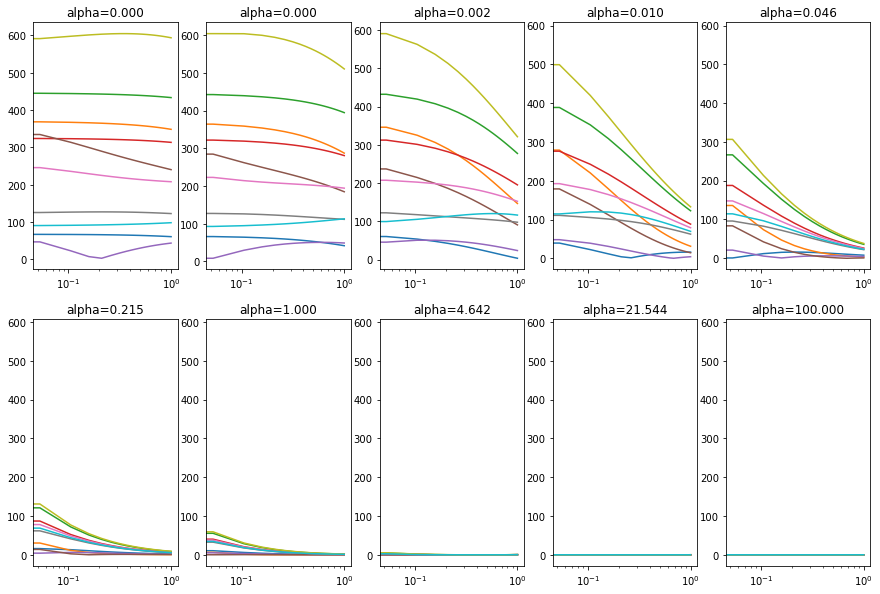

In [20]:
from sklearn.linear_model import ElasticNet

rhos=np.linspace(0,1,20)
print(rhos)
k=1

plt.figure(figsize=[15,10])
for a in lambdas:
    
    coefs_elasticnet=[]
    train_errors_elasticnet=[]
    for rho in rhos:
        elasticnet = ElasticNet(a*rho,a*(1-rho)/2)
        elasticnet.fit(X_train,y_train)
        coefs_elasticnet.append(elasticnet.coef_)
        train_errors_elasticnet.append(r2_score(y_train,elasticnet.predict(X_train)))
    #plot
    plt.subplot(2,5,k)
    plt.title('alpha=%.3f' %a)
    plt.semilogx(rhos, np.abs(coefs_elasticnet))
    
    k=k+1
plt.show()

#### BONUS : LASSO regression ####
Pour LASSO, la tâche est un petit peu plus compliquée en effet, comme la dérivée du risque est un petit peu plus compliquée, il n'existe pas de explicite pour trouver les coefficients, nous allons procéder ensemble. L'algorithme s'appelle la descente de coordonnées. Nous avons la formule suivante :
$$w^i_{LASSO} = \dfrac  {S_{\lambda} ( X_i^T (y- X_{-i}w_{-i}))}{X_i^TX_i}$$
$X_i$ correspond à la colonne i de la matrice X, et $X_{-i}$ correspond à la matrice X à laquelle on a enlevée la colonne i, $w_{-i}$ correspond au vecteur i auquel on a enlevé l'élément i. Enfin $S_{\lambda}$ est une fonction appelée "soft threshold function" définie comme ceci :
$S_{\lambda}(x) = 0$ si $|x|<\lambda$ et $S_{\lambda}(x) = x-\lambda sign(x)$ sinon

*** Exercice *** Concevoir un algorithme, et tracer les résultats (indice : avec la formule précédente on a l'expression d'une coordonnée en fonction de toutes les autres, on peut donc procéder avec plusieurs itérations jusqu'à convergence)

In [22]:
def S(x,Lambda):
    result=0
    if abs(x)<Lambda:
        result=0
    else:
        result=x-Lambda*np.sign(x)
    return result


    
def regLASSO(X_Train,Y_Train,precision,Lambda):
    w=np.ones(len(X_Train[0])) #On initialise avec une valeur de w aleatoire (ici 0)
    score=1        #On initialise le score
    iteration=0
    while (score>precision) : #La condition iteration m'évite de faire une boucle infini
        w_new=w.copy()
        for i in range(w.size): #On veux les vecteur et pas les lignes donc on prends la matrice transposé
            Xi=X_Train[:,i]
            Xmoinsi=np.delete(X_Train,i,1)
            wmoinsi=np.delete(w_new,i)
            Numerateur=S(np.dot(Xi.T,(y_train-np.dot(Xmoinsi,wmoinsi))),Lambda)
            w_new[i]=Numerateur/np.dot(Xi.T,Xi)
        print('wnew',w_new) 
        score=np.linalg.norm(w-w_new)
        print('Precision',score)
        iteration=iteration+1
        w=w_new.copy()
 
    return w

params=regLASSO(X_train,y_train,0.00001,0.2)



wnew [-384.303396    -53.84952467  893.15649157   25.44926747 -473.57874915
 -109.5066743   -28.87976812   88.55183339  363.62890901  -45.29388336]
Precision 1152.2351483222167
wnew [-552.33834246 -148.39336309  890.11654465  125.10124886 -503.98374558
 -173.04735681  101.72881544  141.25638781  484.34806323  -15.39833206]
Precision 295.5996477732451
wnew [-581.99162841 -143.30892458  845.72201441  121.01034036 -523.74828262
 -178.42455975  175.43959798  162.2709806   530.68546446    7.05769097]
Precision 108.80556172506728
wnew [-586.6392247  -124.26750704  843.48448767  102.78144677 -559.47670096
 -161.53579501  223.78203269  170.38679207  551.58761092   17.68331379]
Precision 72.35942266339563
wnew [-588.93265006 -108.49404559  855.85600927   92.88784083 -598.78698192
 -135.21595525  257.68553051  173.33153963  563.75259318   20.91943947]
Precision 63.7150690995946
wnew [-592.31916154  -98.26162541  867.29865317   89.9702747  -637.19463303
 -104.89661126  281.66267328  174.51246455 

wnew [ -603.59545925   -75.70562049   863.97647687    99.93794258
 -2923.93958293  1755.8780393   1250.31484389   356.40848087
  1325.17947028    47.6703556 ]
Precision 7.075734277848162
wnew [ -603.60364348   -75.67121879   863.94910973    99.95663917
 -2928.93166582  1759.92545744  1252.43681827   356.82920703
  1326.81800401    47.73168103]
Precision 6.97661620383867
wnew [ -603.61171307   -75.637299     863.92212595    99.97507386
 -2933.85381878  1763.91617868  1254.52906769   357.2440396
  1328.43358489    47.79214741]
Precision 6.878886592454631
wnew [ -603.61966962   -75.60385436   863.89552016    99.99325032
 -2938.7070214   1767.85099722  1256.59200852   357.65306112
  1330.02653443    47.85176676]
Precision 6.7825259938790925
wnew [ -603.62751471   -75.57087822   863.86928707   100.01117215
 -2943.49223953  1771.73069616  1258.62605133   358.056353
  1331.59716967    47.91055096]
Precision 6.6875152307498755
wnew [ -603.63524991   -75.53836402   863.84342146   100.02884293
 

wnew [ -604.09513176   -73.60529199   862.3056293    101.07942671
 -3228.72146674  2002.98525943  1379.86785105   382.09509641
  1425.21695111    51.4144603 ]
Precision 1.0242736046935033
wnew [ -604.0963165    -73.60031205   862.30166767   101.0821332
 -3229.44411383  2003.57115814  1380.17502516   382.15600015
  1425.45414301    51.42333769]
Precision 1.0099254080303794
wnew [ -604.09748464   -73.59540187   862.29776153   101.08480178
 -3230.15663795  2004.14884948  1380.47789632   382.21605075
  1425.68801229    51.43209072]
Precision 0.9957782033147908
wnew [ -604.09863642   -73.59056047   862.29391011   101.08743298
 -3230.85918091  2004.71844842  1380.77652481   382.27526014
  1425.91860548    51.44072114]
Precision 0.9818291750185536
wnew [ -604.09977206   -73.58578689   862.29011265   101.09002732
 -3231.55188254  2005.28006833  1381.07097006   382.33364012
  1426.14596849    51.44923066]
Precision 0.9680755470543841
wnew [ -604.1008918    -73.58108017   862.28636838   101.0925

wnew [ -604.16922345   -73.29385424   862.05787519   101.24868654
 -3273.91467603  2039.62644091  1399.07803537   385.90392054
  1440.05055851    51.96963801]
Precision 0.12696000688922043
wnew [ -604.1693703    -73.29323697   862.05738414   101.24902202
 -3274.00424905  2039.69906379  1399.11610999   385.91146963
  1440.07995875    51.97073838]
Precision 0.1251815297917204
wnew [ -604.16951509   -73.29262834   862.05689997   101.24935279
 -3274.09256731  2039.77066936  1399.15365126   385.91891298
  1440.10894714    51.97182332]
Precision 0.12342796590042869
wnew [ -604.16965785   -73.29202825   862.05642258   101.24967893
 -3274.1796484   2039.84127187  1399.19066663   385.92625206
  1440.13752946    51.97289308]
Precision 0.12169896622552656
wnew [ -604.16979862   -73.29143656   862.05595188   101.2500005
 -3274.26550964  2039.91088537  1399.2271635    385.93348833
  1440.16571139    51.97394784]
Precision 0.11999418667096372
wnew [ -604.16993741   -73.29085315   862.05548777   101.

wnew [ -604.17837002   -73.25540743   862.02729009   101.26958157
 -3279.49375057  2044.14977275  1401.44952109   386.37411759
  1441.88175844    52.03817437]
Precision 0.016187182341517805
wnew [ -604.17838875   -73.25532873   862.02722748   101.26962434
 -3279.50517097  2044.15903204  1401.45437554   386.37508008
  1441.88550692    52.03831466]
Precision 0.01596042957331165
wnew [ -604.17840721   -73.25525113   862.02716575   101.26966651
 -3279.5164314   2044.16816163  1401.45916198   386.3760291
  1441.88920289    52.03845299]
Precision 0.015736853195998393
wnew [ -604.17842541   -73.25517462   862.02710488   101.2697081
 -3279.52753409  2044.17716333  1401.46388138   386.37696482
  1441.89284708    52.03858938]
Precision 0.015516408713125656
wnew [ -604.17844336   -73.25509918   862.02704487   101.2697491
 -3279.53848125  2044.18603893  1401.46853467   386.37788743
  1441.89644023    52.03872386]
Precision 0.015299052255338797
wnew [ -604.17846105   -73.2550248    862.0269857    1

wnew [ -604.17945719   -73.25083761   862.02365472   101.27206517
 -3280.15688465  2044.68742026  1401.73139813   386.43000565
  1442.09941659    52.04632066]
Precision 0.0030206194465318085
wnew [ -604.17946069   -73.25082292   862.02364303   101.27207315
 -3280.15901576  2044.68914809  1401.73230399   386.43018526
  1442.10011608    52.04634684]
Precision 0.0029783061032605017
wnew [ -604.17946413   -73.25080844   862.02363151   101.27208102
 -3280.16111702  2044.69085173  1401.73319717   386.43036235
  1442.10080577    52.04637266]
Precision 0.002936585491120682
wnew [ -604.17946753   -73.25079417   862.02362016   101.27208878
 -3280.16318885  2044.69253149  1401.73407784   386.43053696
  1442.1014858     52.04639811]
Precision 0.0028954493077407947
wnew [ -604.17947088   -73.25078009   862.02360896   101.27209643
 -3280.16523165  2044.69418773  1401.73494617   386.43070913
  1442.1021563     52.0464232 ]
Precision 0.0028548893674054904
wnew [ -604.17947418   -73.25076621   862.0235

wnew [ -604.17966136   -73.24997941   862.02297201   101.27253158
 -3280.28141899  2044.78838864  1401.78433368   386.44050124
  1442.14029206    52.04785051]
Precision 0.0005479834023516408
wnew [ -604.17966199   -73.24997675   862.02296989   101.27253303
 -3280.28180561  2044.7887021   1401.78449802   386.44053383
  1442.14041896    52.04785526]
Precision 0.0005403071588140263
wnew [ -604.17966262   -73.24997412   862.0229678    101.27253446
 -3280.28218681  2044.78901116  1401.78466006   386.44056595
  1442.14054408    52.04785994]
Precision 0.0005327384454956849
wnew [ -604.17966323   -73.24997153   862.02296574   101.27253587
 -3280.28256266  2044.78931589  1401.78481982   386.44059763
  1442.14066744    52.04786456]
Precision 0.0005252757553005589
wnew [ -604.17966384   -73.24996898   862.0229637    101.27253725
 -3280.28293326  2044.78961636  1401.78497735   386.44062886
  1442.14078908    52.04786911]
Precision 0.0005179176038918849
wnew [ -604.17966444   -73.24996646   862.022

wnew [ -604.1796984    -73.24982372   862.02284815   101.2726162
 -3280.3040113   2044.80670575  1401.79393695   386.44240529
  1442.14770745    52.04812805]
Precision 9.94119965963378e-05
wnew [ -604.17969851   -73.24982324   862.02284777   101.27261646
 -3280.30408144  2044.80676261  1401.79396676   386.4424112
  1442.14773047    52.04812891]
Precision 9.801941617464929e-05
wnew [ -604.17969863   -73.24982276   862.02284739   101.27261672
 -3280.30415059  2044.80681868  1401.79399616   386.44241703
  1442.14775317    52.04812976]
Precision 9.664634324668301e-05
wnew [ -604.17969874   -73.24982229   862.02284701   101.27261697
 -3280.30421878  2044.80687396  1401.79402514   386.44242278
  1442.14777555    52.04813059]
Precision 9.52925044491402e-05
wnew [ -604.17969885   -73.24982183   862.02284665   101.27261723
 -3280.30428601  2044.80692847  1401.79405372   386.44242845
  1442.14779762    52.04813142]
Precision 9.395763140957986e-05
wnew [ -604.17969896   -73.24982137   862.0228462

wnew [ -604.17970512   -73.24979548   862.02282568   101.27263155
 -3280.30810986  2044.81002873  1401.79567912   386.44275072
  1442.14905271    52.0481784 ]
Precision 1.803475251867195e-05
wnew [ -604.17970514   -73.24979539   862.02282561   101.27263159
 -3280.30812259  2044.81003905  1401.79568452   386.44275179
  1442.14905689    52.04817855]
Precision 1.7782119328989927e-05
wnew [ -604.17970516   -73.24979531   862.02282554   101.27263164
 -3280.30813513  2044.81004922  1401.79568986   386.44275285
  1442.14906101    52.04817871]
Precision 1.7533024078685765e-05
wnew [ -604.17970518   -73.24979522   862.02282548   101.27263169
 -3280.3081475   2044.81005925  1401.79569512   386.44275389
  1442.14906507    52.04817886]
Precision 1.72874182705343e-05
wnew [ -604.1797052    -73.24979514   862.02282541   101.27263173
 -3280.3081597   2044.81006914  1401.7957003    386.44275492
  1442.14906907    52.04817901]
Precision 1.7045253267066692e-05
wnew [ -604.17970522   -73.24979505   862.0

### Questions théoriques bonus ###  
<ul>

<li> Dérivez $ \hat {\textbf {w}} $ explicitement en résolvant le problème des moindres carrés défini ci-dessus.


<li> Est-ce que $ \hat {\textbf {w}} $ est toujours bien défini quand le rang $r(\mathbf {X})<p$? Cela se produit lorsque, par exemple, $ n<p $.

<li> Imaginons maintenant que les exemples soient générés de la manière suivante: $ y_i = \textbf {w} _ \text {true} \cdot \textbf {x} ^ {(i)} + \epsilon_i $ où les $ \epsilon_i \sim \mathcal {N} (0, \sigma ^ 2) $ sont iid Gaussiens. Le risque intra-échantillon est défini comme
$$
R (\hat {\textbf {w}}, \textbf {w} _ \text {true}) = \frac {1} {n} \mathbb {E} [(\mathbf {X} \hat {\textbf {w}} - \mathbf {X} {\textbf {w} _ \text {true}}) ^ 2],
$$
où $ \mathbb {E} [\cdots] $ est repris sur toutes les paires iid $ (y_i, \textbf {x} ^ {(i)}) $ et $ \hat {\textbf {w}} $ est le moins carrés solution donnée ci-dessus. En supposant que $ \mathbf {X} $ et $ \epsilon_i $ soient indépendants, montrez que le risque est donné par

$$
R (\hat {\textbf {w}}, \textbf {w} _ \text {true}) = \sigma ^ 2 \frac {p} {n}
$$
Quelle est l’implication de cela pour $ p $ fixe en tant que $ n \rightarrow \infty $? Qu'en est-il de quand $ p, n $ évolue ensemble?

</ul>

## Exercises pour RIDGE: ##

Dans la Ridge-Regression, la pénalité de régularisation est la norme L2 des paramètres
$$
\mathbf{w}_{ridge}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} ||\mathbf{X}\textbf{w}-\textbf{y}||_2^2 + \lambda ||\textbf{w}||_2^2.
$$

Ainsi, le modèle est ajusté en minimisant la somme de l'erreur dans l'échantillon et du terme de régularisation
$$
\mathbf{w}_{ridge}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} ||\mathbf{X}\textbf{w}-\textbf{y}||_2^2 + \lambda ||\textbf{w}||_2^2.
$$
Notez que le paramètre $ \lambda $ contrôle combien nous pesons le terme d’ajustement et de régularisation.

<ul>
<li>Montrer que la solution est donnée par $\mathbf{w}_{ridge}= (\mathbf{X}^T\mathbf{X}+\lambda I)^{-1}\mathbf{X}^T \textbf{y}$. 
<li>Exprimez votre réponse en termes de décomposition en valeurs singulières de $\mathbf{X}$.
</ul>

<Li>
$R_{ridge}(\lambda,\textbf{w})=||\mathbf{X}\textbf{w}-\textbf{y}||_2^2 + \lambda ||\textbf{w}||_2^2$.

Dérivons l'expression du risque ridge par rapport à $\textbf{w}$ afin de trouver son minimum.

$\frac {\partial{R_{ridge}(\lambda,\textbf{w})}} {\partial\textbf{w}}= -2\textbf{y}^{T}\textbf{X}+2\textbf{w}^{T}\textbf{X}^{T}\textbf{X}+2\lambda \textbf{w}^{T}$.
Cette expression s'annule si $\mathbf{w}_{ridge}= (\mathbf{X}^T\mathbf{X}+\lambda I)^{-1}\mathbf{X}^T \textbf{y}$.
<Li>
Nous n'avons pas vu la décompostion en valeurs singulières en mathématiques

## Exercises pour LASSO ##

Nous nous intéresserons également au cas où la pénalité est la norme L1 des paramètres (somme des valeurs absolues des paramètres). Ceci s'appelle LASSO.
$$
E_{LASSO}= \lambda ||\mathbf{w}||_1 = \lambda \sum_{\gamma=1}^p |w_\gamma| .
$$
Dans ce cas,
$$
\textbf{w}_{LASSO}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} {1 \over 2n} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1.
$$
Notez que le préfacteur $ 1 / (2n) $ dans la fonction de perte n'est pas essentiel à cette formulation. Nous avons choisi cette forme pour être cohérente avec le package Scikit-Learn en Python. Comme nous en avons discuté en cours, LASSO a tendance à donner des solution parcimonieuses. 

<ul>
<li> Pouvez-vous dériver une expression analytique pour $ \mathbf {w} _ {LASSO} $? Avez-vous des idées sur la manière dont nous pourrions être en mesure de le calculer numériquement efficacement?
<li> Pensez-vous que LASSO et Ridge Regression donneront des réponses qualitativement différentes? (Considérez les limites $ \lambda = 0$ et $ \lambda = \infty $)
</ul>

<ul>
<Li>
Nous avons fait les calucls de $\textbf{w}_{LASSO}(\lambda)$ dans l'exercice bonus plus haut
<Li>
Les regressions de LASSO et ridge apportent une différence du point de la convergence du chemin de régularisation . 